In [ ]:
from google_images_download import google_images_download   #importing the library

response = google_images_download.googleimagesdownload()   #class instantiation

arguments = {"keywords":"dragon ball z anime, dbz anime,goku transparent, vegeta anime,piccolo anime","limit":100,"print_urls":True}   #creating list of arguments
paths = response.download(arguments)   #passing the arguments to the function
print(paths)   #printing absolute paths of the downloaded images

In [ ]:
import split_folders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
split_folders.ratio('downloads', output="dataset", seed=1337, ratio=(.8, .2)) # default values

# Split val/test with a fixed number of items e.g. 100 for each set.
# To only split into training and validation set, use a single number to `fixed`, i.e., `10`.
# split_folders.fixed('downloads', output="dataset", seed=1337, fixed=(100, 100), oversample=False) # default values

# Convolutional Neural Network

## Part 1 - Building the CNN

In [62]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [72]:
# Initialising the CNN
classifier = Sequential()

In [73]:
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))

'''
* 32 feature detector-->32 feature maps (size of 5x5). (64 if using a GPU)
* feature detector consists of 3 rows and 3 columns.

* input_shape= shape of input image (converting all images to fixed size/image format)
* since the images are color images, they will be converted into 3-D arrays.
* 64x64 format (128 or 256 if using a GPU)

* activation function 'relu' is most commonly used for CNN.
'''

"\n* 32 feature detector-->32 feature maps (size of 5x5). (64 if using a GPU)\n* feature detector consists of 3 rows and 3 columns.\n\n* input_shape= shape of input image (converting all images to fixed size/image format)\n* since the images are color images, they will be converted into 3-D arrays.\n* 64x64 format (128 or 256 if using a GPU)\n\n* activation function 'relu' is most commonly used for CNN.\n"

In [74]:
# Step 2 - Max Pooling
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.2))

'''reduces the size of our feature maps into 2x2 (reducing the complexity of the model).'''

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.2))

In [75]:
# Step 3 - Flattening
classifier.add(Flatten())

In [76]:
# Step 4 - Full connection
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.5))
'''
* units= number of nodes in the hidden layer(full connection).

* 128 is not too small, but it can be higher if using GPU.

* activation function 'relu' is most commonly used for CNN.
'''

# Final output layer
classifier.add(Dense(units=1, activation='sigmoid'))

'''
* activation function 'sigmoid' because we have a binary outcome. If we have more, need to use 'softmax'.
'''

"\n* activation function 'sigmoid' because we have a binary outcome. If we have more, need to use 'softmax'.\n"

In [77]:
# Compiling the CNN
classifier.compile(
    optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

''' 
* 'adam' is a good stochastic gradient descent optimizer for CNN.

* cross entropy loss function is usually used for classifcation problems. Because we have a binary outcome, we
use 'binary_crossentropy'. If we had more we'd need to use 'categorical_crossentropy'.
'''

" \n* 'adam' is a good stochastic gradient descent optimizer for CNN.\n\n* cross entropy loss function is usually used for classifcation problems. Because we have a binary outcome, we\nuse 'binary_crossentropy'. If we had more we'd need to use 'categorical_crossentropy'.\n"

## Part 2 - Fitting the CNN to the images

### Image Preprocessing

In [78]:
from keras.preprocessing.image import ImageDataGenerator

'''
* Image Data Generator is the first step the Image Augmentation which will help prevent overfitting
(when we have few data points to train our model).

* It creates many batches of the images, and for each batch it will apply some random transformations to them so
we'll get many more diverse images within these batches.'''


train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

'''
* rescale the images to a standard size
* shear_range is a geomatrical transformation of the pixels.
* zoom_range is a random zoom we apply to the images.
'''

training_set = train_datagen.flow_from_directory('dataset/train',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory('dataset/val',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 647 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


### Checkpoint

In [79]:
# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

### Fit Generator

In [80]:
results=classifier.fit_generator(training_set,
                         steps_per_epoch=647,
                         epochs=5,
                         validation_data=test_set,
                         callbacks=callbacks_list,
                         validation_steps=160)

'''
* steps_per epoch should equal the number of images in the training set.
* can use more than 25 epochs if using a GPU.
* validation_steps should equal the number of images in the testing set.
'''

Epoch 1/5
647/647 [==============================] - 731s 1s/step - loss: 0.3237 - acc: 0.8553 - val_loss: 0.3669 - val_acc: 0.8250

Epoch 00001: val_acc improved from -inf to 0.82500, saving model to weights.best.hdf5
Epoch 2/5
647/647 [==============================] - 720s 1s/step - loss: 0.1159 - acc: 0.9558 - val_loss: 0.4287 - val_acc: 0.8500

Epoch 00002: val_acc improved from 0.82500 to 0.85000, saving model to weights.best.hdf5
Epoch 3/5
647/647 [==============================] - 720s 1s/step - loss: 0.0582 - acc: 0.9802 - val_loss: 0.5397 - val_acc: 0.8750

Epoch 00003: val_acc improved from 0.85000 to 0.87500, saving model to weights.best.hdf5
Epoch 4/5
647/647 [==============================] - 721s 1s/step - loss: 0.0371 - acc: 0.9883 - val_loss: 0.6324 - val_acc: 0.8438

Epoch 00004: val_acc did not improve from 0.87500
Epoch 5/5
647/647 [==============================] - 725s 1s/step - loss: 0.0203 - acc: 0.9938 - val_loss: 0.8014 - val_acc: 0.8375

Epoch 00005: val_acc 

'\n* steps_per epoch should equal the number of images in the training set.\n* can use more than 25 epochs if using a GPU.\n* validation_steps should equal the number of images in the testing set.\n'

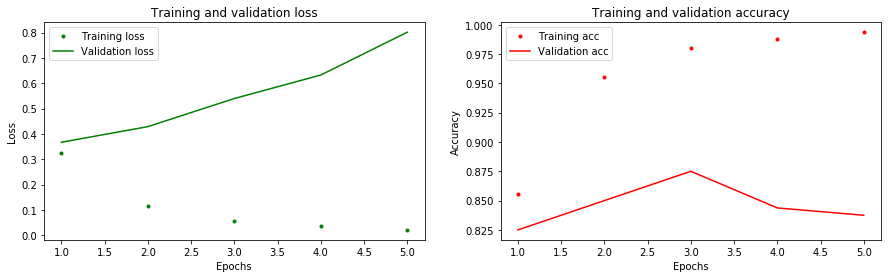

In [81]:
hist = results.history
loss_values = hist['loss']
val_loss_values = hist['val_loss']
acc_values = hist['acc'] 
val_acc_values = hist['val_acc']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [82]:
classifier.save('model2.h5')

In [85]:
from keras.models import load_model
model2 = load_model('Models/model2.h5')
model2.load_weights('Models/model2_weights.best.hdf5')

In [86]:
model2.evaluate_generator(generator=test_set,
steps=160)

[0.5368599732406437, 0.875]